## File 2: Multivariable KMeans Method $\rightarrow$ performance & analysis

Mass - radius - temperature 

Should we standardize the data, at this point? Yes! We'll be dealing with 


From Laughlin & Lissauer (2015) and  S. Seager (2011):
$$
T_{\mathrm{eq}}=[f(1-A)]^{1/4} \left(\frac{R_{\star}}{2 a}\right)^{1 / 2} \frac{T_{\star}}{\left(1-e^{2}\right)^{1 / 8}}
$$
Params meeded: $R_{\star}, a, T_{\star}, e$

1183 296


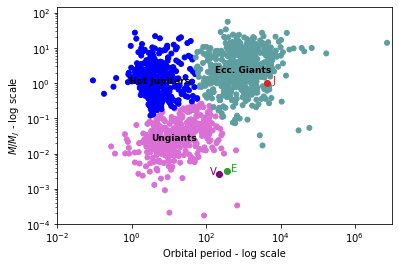

In [2]:
%run read+groups.ipynb

In [8]:
%run scripts.py

<Figure size 432x288 with 0 Axes>

In [63]:
param_Teff=['obj_phys_mass_mjup', 'obj_phys_radius_rjup',
           'obj_parent_phys_teff_k','obj_orb_ecc','obj_orb_a_au','obj_parent_phys_radius_rsun']

d_US_MRT, d_EU_MRT = read_file(file_US, param_Teff), read_file(file_EU, param_Teff)

In [98]:
print(len(d_US_MRT),len(d_EU_MRT))

507 507


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


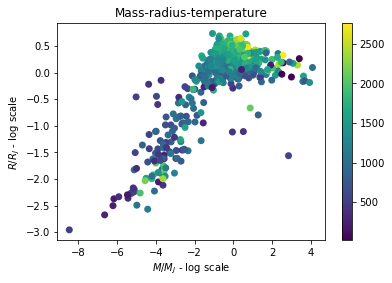

In [19]:
d_US_MRT=d_US_MRT[['obj_phys_mass_mjup','obj_phys_radius_rjup','temp_eq']]
kmeans = KMeans(n_clusters=3).fit(np.log(d_US_MRT))
centroids, labels = kmeans.cluster_centers_, kmeans.labels_
colors = ['r','b','c']

M_US, R_US, Teq_US = d_US_MRT['obj_phys_mass_mjup'], d_US_MRT['obj_phys_radius_rjup'], d_US_MRT['temp_eq']
c1 = plt.cm.BuPu((Teq_US-np.min(Teq_US))/np.ptp(Teq_US))
plt.scatter(np.log(M_US), np.log(R_US), c = Teq_US, s=30, linewidths=1.5, marker='o')
plt.xlabel(r"$M/M_J$ - log scale")
plt.ylabel(r"$R/R_J$ - log scale")
plt.title(r"Mass-radius-temperature")
plt.colorbar()
plt.show()

In [85]:
ungiants = data_MP.loc[lambda data_MP:data_MP['labels']==2]
hotjups = data_MP.loc[lambda data_MP:data_MP['labels']==1]
ecc_giants = data_MP.loc[lambda data_MP:data_MP['labels']==0]
data_MP

Planet,obj_orb_period_day,obj_phys_mass_mjup,labels,names
CoRoT-12 b,2.828042,0.917000,1,Hot Jupiters
CoRoT-18 b,1.900069,3.470000,1,Hot Jupiters
HD 4313 b,356.210000,1.927000,0,Ecc. Giants
HD 50499 b,2447.100000,1.636000,0,Ecc. Giants
HD 66428 b,2263.120000,3.204000,0,Ecc. Giants
...,...,...,...,...
JUPITER,4346.475000,0.999911,0,Ecc. Giants
SATURN,10738.350000,0.299533,0,Ecc. Giants
URANUS,30571.425000,0.045622,0,Ecc. Giants
NEPTUNE,59791.425000,0.053803,0,Ecc. Giants


In [22]:
d_EU_MRT

,obj_phys_mass_mjup,obj_phys_radius_rjup,temp_eq,obj_parent_phys_teff_k,obj_orb_ecc,obj_orb_a_au,obj_parent_phys_radius_rsun
obj_id_catname,,,,,,,
CoRoT-12 b,0.917,1.4400,1443.447751,5675.0,0.0700,0.04016,1.116
TOI-216 b,0.082,0.7670,585.541044,5045.0,0.1050,0.12930,0.747
WASP-46 b,2.101,1.3100,1658.626403,5620.0,0.0000,0.02448,0.917
CoRoT-13 b,1.308,0.8850,1275.735837,5945.0,0.0000,0.05100,1.010
HATS-31 b,0.880,1.6400,1837.493123,6050.0,0.2330,0.04780,1.870
...,...,...,...,...,...,...,...
K2-39 b,0.125,0.7300,1867.373030,4881.0,0.1520,0.06200,3.880
Kepler-107 d,0.012,0.0767,1157.520509,5851.0,0.0000,0.08377,1.410
Kepler-1647 (AB) b,1.520,1.0600,243.002426,6210.0,0.0581,2.72050,1.790


In [10]:
param_Teff=['obj_orb_period_day','obj_phys_mass_mjup', 'obj_phys_radius_rjup',
           'obj_parent_phys_teff_k','obj_orb_ecc','obj_orb_a_au','obj_parent_phys_radius_rsun']

data_US, data_EU = exo_sol(file_US,cat_solar,param_Teff), exo_sol(file_EU,cat_solar,param_Teff)
add_temp_eq_dataset(data_US), add_temp_eq_dataset(data_EU)

ungt_Teq = data_EU.loc[data_EU.index.intersection(ungiants.index)]
ungt_Teq = ungt_Teq.drop('PLUTO')

In [80]:
ungt_MRT = d_EU_MRT.loc[d_EU_MRT.index.intersection(ungiants.index)]
ungt_MRT

,obj_phys_mass_mjup,obj_phys_radius_rjup,temp_eq,obj_parent_phys_teff_k,obj_orb_ecc,obj_orb_a_au,obj_parent_phys_radius_rsun
K2-290 b,0.066400,0.273000,1229.541179,6302.0,0.000,0.092300,1.511
Kepler-21 b,0.016000,0.146200,1950.928783,6131.0,0.020,0.042717,1.860
Kepler-25 b,0.028000,0.241100,1335.287648,6190.0,0.050,0.068000,1.360
Kepler-107 b,0.011040,0.137030,1571.642596,5851.0,0.000,0.045440,1.410
Kepler-11 b,0.005978,0.160586,952.263811,5680.0,0.000,0.091000,1.100
...,...,...,...,...,...,...,...
K2-27 b,0.097200,0.397000,920.991817,5320.0,0.250,0.067020,0.850
K2-265 b,0.020580,0.152600,1422.022628,5477.0,0.084,0.033760,0.977
Kepler-289 b,0.023000,0.192000,630.349991,5990.0,0.024,0.210000,1.000
K2-39 b,0.125000,0.730000,1867.373030,4881.0,0.152,0.062000,3.880


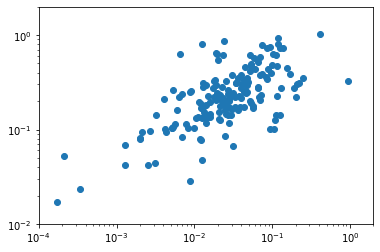

In [69]:
M_MR, R_MR = ungt_MR['obj_phys_mass_mjup'],ungt_MR['obj_phys_radius_rjup']
plt.scatter(M_MR,R_MR)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10e-5,2)
plt.ylim(10e-3,2)
plt.show()

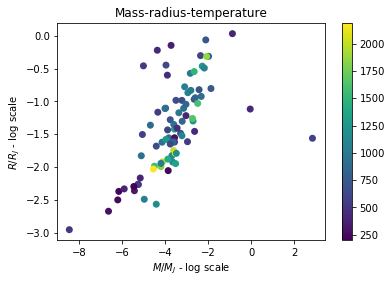

In [94]:
ungt_MRT
M2,R2,T2=ungt_MRT['obj_phys_mass_mjup'],ungt_MRT['obj_phys_radius_rjup'],ungt_MRT['temp_eq']
plt.scatter(np.log(M2), np.log(R2), c = T2, s=30, linewidths=1.5, marker='o')
plt.xlabel(r"$M/M_J$ - log scale")
plt.ylabel(r"$R/R_J$ - log scale")
plt.title(r"Mass-radius-temperature")
plt.colorbar()
plt.show()